# Custom training: basics
Source: https://www.tensorflow.org/alpha/tutorials/eager/custom_training

In [1]:
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

## Variables

In [2]:
# Using python state
x = tf.zeros([10, 10])
x += 2  # This is equivalent to x = x + 2, which does not mutate the original
        # value of x
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# Re-assign the value
v.assign(3.0)
assert v.numpy() == 3.0

# Use `v` in a TensorFlow operation like tf.square() and reassign
v.assign(tf.square(v))
assert v.numpy() == 9.0

## Example: Fitting a linear model
Let's now put the few concepts we have so far ---Tensor, GradientTape, Variable --- to build and train a simple model. This typically involves a few steps:

- Define the model.
- Define a loss function.
- Obtain training data.
- Run through the training data and use an "optimizer" to adjust the variables to fit the data.


In this tutorial, we'll walk through a trivial example of a simple linear model: f(x) = x * W + b, which has two variables - W and b. Furthermore, we'll synthesize data such that a well trained model would have W = 3.0 and b = 2.0.



### Define the model
Let's define a simple class to encapsulate the variables and the computation.



In [8]:
class Model(object):
  def __init__(self):
    # Initialize variable to (5.0, 0.0)
    # In practice, these should be initialized to random values.
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b
  
model = Model()

assert model(3.0).numpy() == 15.0

### Define a loss function
A loss function measures how well the output of a model for a given input matches the desired output. Let's use the standard L2 loss.

In [5]:
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

### Obtain training data
Let's synthesize the training data with some noise.



In [6]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

Before we train the model let's visualize where the model stands right now. We'll plot the model's predictions in red and the training data in blue.



In [9]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

<Figure size 640x480 with 1 Axes>

Current loss: 
8.664076


### Define a training loop

In [12]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.66408
Epoch  1: W=4.63 b=0.40, loss=5.97615
Epoch  2: W=4.33 b=0.72, loss=4.23169
Epoch  3: W=4.09 b=0.98, loss=3.09933
Epoch  4: W=3.89 b=1.19, loss=2.36417
Epoch  5: W=3.73 b=1.35, loss=1.88680
Epoch  6: W=3.60 b=1.48, loss=1.57677
Epoch  7: W=3.50 b=1.59, loss=1.37539
Epoch  8: W=3.41 b=1.68, loss=1.24455
Epoch  9: W=3.34 b=1.74, loss=1.15954


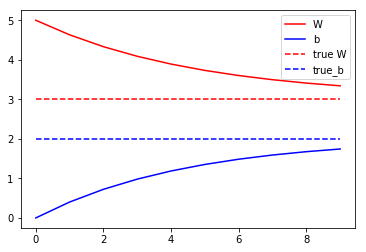

In [14]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()
  
